<a href="https://colab.research.google.com/github/oscar221307/PROCESAMIENTO/blob/main/Laboratorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

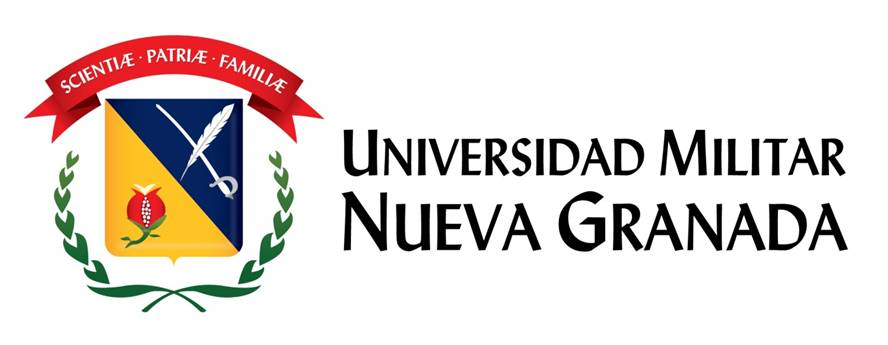


**Informe #02, ‚Äú An√°lisis de Frecuencias de Se√±ales de Voz-Plan Coctel‚Äù**

Lauren Blanco, Sof√≠a Su√°rez ‚Äì 5600585 (est.lauren.blanco@unimilitar.edu.co)

Oscar Acero, David Sarmiento ‚Äì 5600602(est.oscar.acero@unimilitar.edu.co)

Laboratorio de Procesamiento Dig√≠tal de Se√±ales

Doc. Andrea Carolina Corredor Bedoya

13 Septiembre 2024

---



**1.	Resumen:**A lo largo del desarrollo pr√°ctico el presente laboratorio,busca aislar una voz espec√≠fica en un entorno ruidoso con m√∫ltiples hablantes, emulando el problema de la "fiesta de c√≥ctel". A trav√©s de un arreglo de micr√≥fonos y t√©cnicas de separaci√≥n de fuentes ciegas, que lograron ser capturadas y analizadas mediante las se√±ales de audio mezcladas, aplicando algoritmos para desenredar las voces entrelazadas y extraer la voz deseada con la mayor claridad posible,que seran importantes para evaluar la eficacia del m√©todo de separaci√≥n, la relaci√≥n de se√±al- ruido (SNR) y los diferentes enfoques claves como el n√∫mero de micr√≥fonos y la ubicaci√≥n de las fuentes.

**Palabras Claves:** Aislamiento de se√±al, An√°lisis ac√∫stico, Arreglo de micr√≥fonos, Beamforming, Captura de se√±ales mezcladas, Extracci√≥n de voz, ICA (An√°lisis de componentes independientes), Procesamiento de se√±ales, Relaci√≥n se√±al-ruido (SNR), Separaci√≥n de fuentes, Sistema de adquisici√≥n, T√©cnicas BSS (Blind Source Separation).

---

**2.Objetivo de la Pr√°ctica:** Analizar se√±ales de voz en el dominio de la frecuencia para abordar el problema de la separaci√≥n de fuentes en un entorno de captura de audio con m√∫ltiples hablantes.

---
**3. Procedimiento, Desarrollo y An√°lisis:**

**3.1 Captura de Se√±ales de Audio en un Entorno Real:**Para la adquisici√≥n de las se√±ales de audio, se simul√≥ un escenario de "fiesta de c√≥ctel", donde tres fuentes (personas) conversaban simult√°neamente, cada una con un timbre de voz distinto (agudo, grave y normal). Se implement√≥ una configuraci√≥n triangular de micr√≥fonos, ubicados estrat√©gicamente a distancias equidistantes para garantizar una captura equilibrada del sonido y minimizar la interferencia entre ellos.

Los micr√≥fonos registraron en primer lugar el ruido de fondo presente en el entorno cuando nadie hablaba, como las voces de las fuentes en el ejercicio de simulaci√≥n, creando una mezcla compleja de se√±ales de audio representativa del escenario planteado.

Cabe destacar que, aunque se intent√≥ realizar una prueba de audio en un espacio de insonorizaci√≥n dentro del laboratorio, se presentaron dificultades t√©cnicas que afectaron la cuantificaci√≥n precisa de las se√±ales. A pesar de ello, se incluye evidencia del trabajo realizado en clase para ilustrar el proceso y los resultados obtenidos.

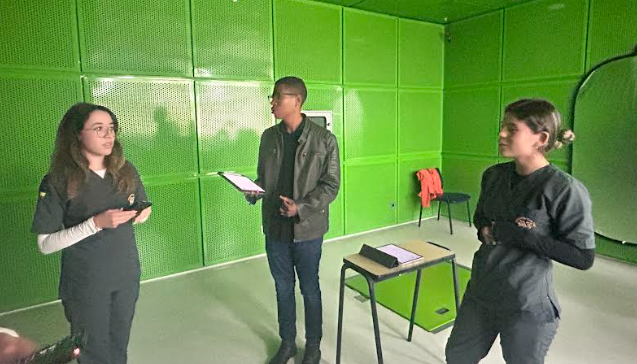

**Figura #01. "Evidencia Trabajo en Clase".Elaboraci√≥n Propia**

A continuaci√≥n, se presenta en la siguiente imagen la distribuci√≥n final de las fuentes sonoras y los micr√≥fonos empleados para recrear el escenario y llevar a cabo la captura de las se√±ales de audio.

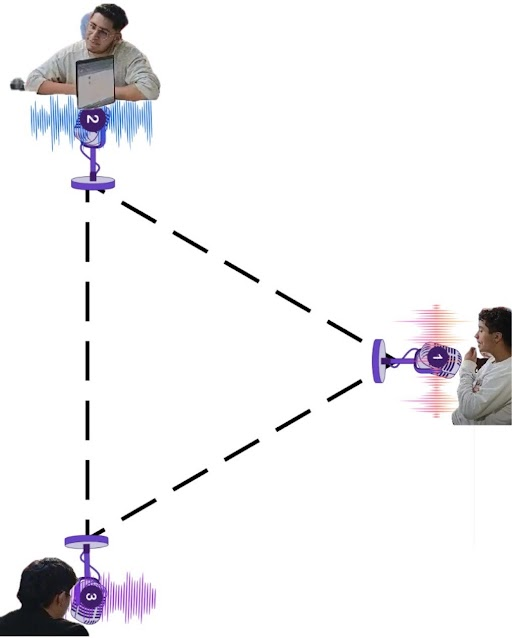


**Figura #02. " Distribuci√≥n Triangular de Fuentes".Elaboraci√≥n Propia**


Una vez obtenidas las se√±ales de audio, se exportaron a una carpeta com√∫n donde se guardar√≥n todos los documentos necesarios en formato de WAV (formato de audio en forma de onda), como se muestra acontinuaci√≥n :

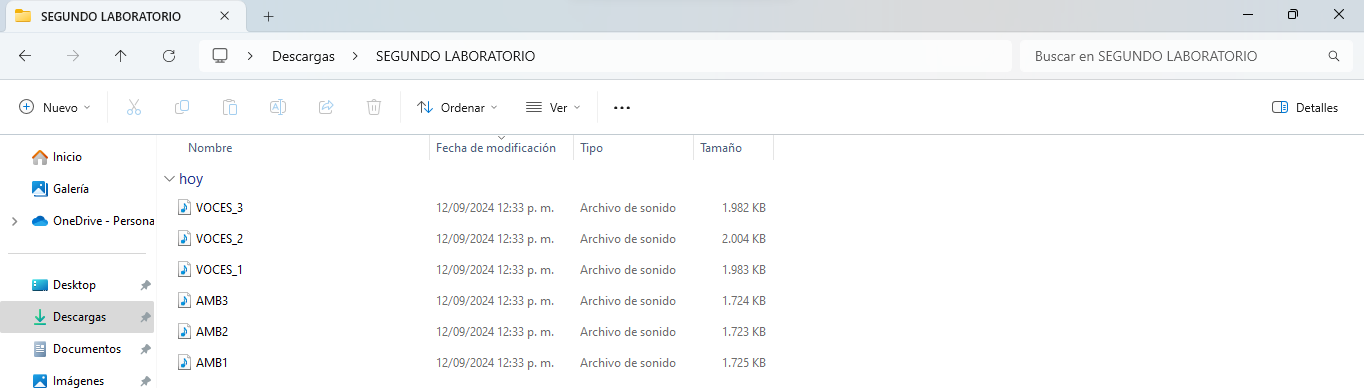

**Figura #03. " Carpeta de audios con formato WAV".  Elaboraci√≥n Propia.**

**3.2 Importaci√≥n de Librerias Iniciales:** En este apartado se importan las librerias utilizadas para desarrollar el laboratorio con el fin de extraer se√±ales de audio individuales a partir de una mezcla, mejorando la inteligibilidad y la calidad del audio en entornos ruidosos.

La funci√≥n de las librerias para el desarrollo de este laboratorio seaplican de la siguiente manera:

*  **Librosa:** Es una biblioteca fundamental para el an√°lisis y manipulaci√≥n de audio en Python, que proporciona herramientas para cargar, visualizar y transformar se√±ales de audio.
*  **Numpy:** El paquete esencial para computaci√≥n num√©rica en Python, que permite realizar operaciones matem√°ticas eficientes en matrices y arreglos.
*   **Matplotlib.pyplot:** Es una biblioteca est√°ndar para crear visualizaciones en este caso es escencial para graficar cada una de las se√±ales de audio.
*  **sklearn.decomposition.FastICA:** Implementa el algoritmo de An√°lisis de Componentes Independientes (ICA), para separar fuentes de audio mezcladas asumiendo que son estad√≠sticamente independientes.
*   **soundfile:** Permite leer y escribir una variedad de formatos de archivos de audio de manera sencilla.
*   **scipy.signal:** Proporciona funciones para el dise√±o y aplicaci√≥n de filtros, especificamente el pasabandas de tipo Butterworth.

*   **pyroomacoustics.Beamformer:** Implementa t√©cnicas de beamforming, que permiten enfocar la captura de audio en una direcci√≥n espec√≠fica, mejorando la relaci√≥n se√±al-ruido y facilitando la separaci√≥n de fuentes.






In [ ]:
#importaci√≥n de las librerias
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import soundfile as sf
from scipy.signal import butter, lfilter
!pip install pyroomacoustics
from pyroomacoustics import Beamformer
!pip install colorama
from colorama import Fore, init #Colores
from scipy.signal import stft, istft
import scipy.signal as signal

**3.3 Condiciones Iniciales:** En esta secci√≥n, se detallar√°n las condiciones iniciales y los par√°metros t√©cnicos empleados durante la captura de las se√±ales de audio y el desarrollo adecuado de t√©cnicas de procesamiento para comprender el contexto en el que se realiz√≥ el experimento.

**3.3.1 Frecuencia de Muestreo**: Oppenheim,en su libro "Procesamiento de se√±ales en tiempo discreto" describe que la frecuencia de muestreo, representa la cantidad de muestras de una se√±al que se toma por segundo, esta expresada en hercios (Hz).

La f√≥rmula general para calcular  la frecuencia de muestreo es:

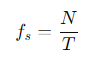

Donde:
* fs es la frecuencia de muestreo (Hz).
* ùëÅ es el n√∫mero total de muestras tomadas.
* ùëá es la duraci√≥n total de la se√±al (en segundos).

Con lo anterior, mediante el teorema de Nyquist la frecuencia de muestreo debe ser al menos el doble de la frecuencia m√°s alta presente en la se√±al original. En el caso del audio audible, el rango de frecuencias que el o√≠do humano puede percibir se extiende aproximadamente desde 20 Hz hasta 20.000 Hz. Por lo tanto, seg√∫n el teorema de Nyquist, una frecuencia de muestreo de al menos 40.000 Hz ser√≠a necesaria para capturar todo el espectro audible.

**¬øQu√© representa la Selecci√≥n la Frecuencia a 44.100 Hz?**

Se seleccion√≥ una frecuencia de muestreo de 44,100 Hz para la grabaci√≥n, ya que se utilizaron equipos de la marca Apple, cuya configuraci√≥n predeterminada en sus dispositivos de audio sigue este est√°ndar.

La selecci√≥n de esta frecuencia estandar, permite comprobar que se cumple el Teorema de Nyquist ya que 44, 100 Hz es ligeramente superior al doble de la frecuencia m√°xima audible (20, 000 Hz), lo que garantiza una captura adecuada del espectro de audio perceptible por el o√≠do.

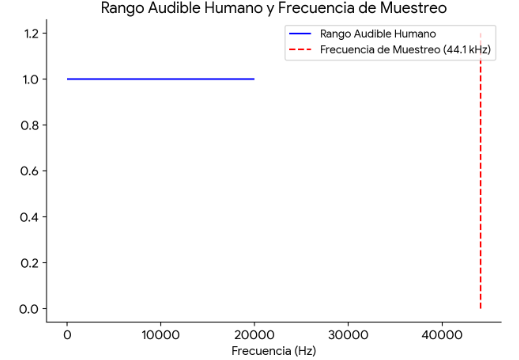

**Figura #04."Relaci√≥n entre el Rango Audible Humano y la Frecuencia de Muestreo Escogida"**


Con la figura anterior queda m√°s claro la relaci√≥n, la l√≠nea azul representa el rango t√≠pico de frecuencias que los humanos pueden escuchar, desde 20 Hz hasta 20 000 Hz y la l√≠nea discontinua roja marca la frecuencia de muestreo elegida de 44.100 Hz.

**Comprobaci√≥n Matem√°tica del Calculo de Nyquist:**

El Teorema de Nyquist establece que:

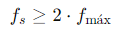

Donde:
* fs es la frecuencia de muestreo.
* ùëìmax es la frecuencia m√°xima de la se√±al, en este caso, 20,000 Hz.

Aplicando los valores:

image.png

Como la frecuencia de muestreo seleccionada es     44,100 Hz, que es mayor que 40,000 Hz, se cumple el Teorema de Nyquist, garantizando que se puede capturar el rango completo de frecuencias audibles (hasta 20,000 Hz) sin p√©rdida de informaci√≥n lo que permite en el laboratorio la captura completa del espectro de las voces humanas, incluso en un entorno ruidoso como lo es la fiesta, por lo que es suficiente para capturar todos los componentes relevantes del habla.

A continuaci√≥n se presenta de manera indivual, las frecuencias de muestreo del ambiente individual y a su vez la de las voces de cada fuente:

In [ ]:
amb1, amb1_sr = librosa.load('AMB1.wav', sr=44100)
amb2, amb2_sr = librosa.load('AMB2.wav', sr=44100)
amb3, amb3_sr = librosa.load('AMB3.wav', sr=44100)
voces1, voces1_sr = librosa.load('VOCES_1.wav', sr=44100)
voces2, voces2_sr = librosa.load('VOCES_2.wav', sr=44100)
voces3, voces3_sr = librosa.load('VOCES_3.wav', sr=44100)

print(Fore.BLUE +"Frecuencia de muestreo de AMB1:", amb1_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de AMB2:", amb2_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de AMB3:", amb3_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de VOCES_1:", voces1_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de VOCES_2:", voces2_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de VOCES_3:", voces3_sr, "Hz")

Frecuencia de muestreo de AMB1: 44100 Hz
Frecuencia de muestreo de AMB2: 44100 Hz
Frecuencia de muestreo de AMB3: 44100 Hz
Frecuencia de muestreo de VOCES_1: 44100 Hz
Frecuencia de muestreo de VOCES_2: 44100 Hz
Frecuencia de muestreo de VOCES_3: 44100 Hz


**3.3.2C√°lculo de Relaci√≥n se√±al-ruido (SNR).**

En este apartado, se evaluar√° la calidad de la se√±al
 de audio extra√≠da para cada una de las 3 fuentes. El objetivo es medir la relaci√≥n se√±al-ruido (SNR) para cada una ante un ruido ambiente, permitiendo as√≠ cuantificar el impacto del ruido en la se√±al obtenidos mediante la tecnica de SNR.

**¬øQu√© es la relaci√≥n se√±al ruido (SNR)?**

Seg√∫n Proakis,J.G (2007) en su libro "Digital Signal Processing: Principles, Algorithms, and Applications (4th ed.). Prentice Hall." describe la relacci√≥n se√±al-ruido (SNR) como una medida que compara  el nivel de la se√±al deseada con el nivel de ruido presente en la se√±al. Este parametro tiene en cuenta que los niveles altos de un SNR significa que la se√±al sobresale claramente sobre el ruido y si es bajo  significa que el ruido es comparable o superior a la se√±al, lo que puede deteriorar significativamente la calidad de la se√±al.


La f√≥rmula general para calcular el SNR en Decibelios (dB) es:

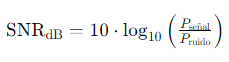

Donde:

* Pse√±al es la potencia de la se√±al.
* Pruido es la potencia del ruido.


Antes de mostrar esta relaci√≥n de Se√±al ruido, se va a mostrar la longitud de cada una de las se√±ales.

In [ ]:
amb1, amb1_sr = librosa.load('AMB1.wav', sr=44100)
amb2, amb2_sr = librosa.load('AMB2.wav', sr=44100)
amb3, amb3_sr = librosa.load('AMB3.wav', sr=44100)
voces1, voces1_sr = librosa.load('VOCES_1.wav', sr=44100)
voces2, voces2_sr = librosa.load('VOCES_2.wav', sr=44100)
voces3, voces3_sr = librosa.load('VOCES_3.wav', sr=44100)

print(Fore.GREEN + "Longitud de las Se√±ales Individuales:")
print(Fore.GREEN+ "Longitud de AMB1:", len(amb1))
print("Longitud de AMB2:", len(amb2))
print("Longitud de AMB3:", len(amb3))
print("Longitud de VOCES_1:", len(voces1))
print("Longitud de VOCES_2:", len(voces2))
print("Longitud de VOCES_3:", len(voces3))

Longitud de las Se√±ales Individuales:
Longitud de AMB1: 441434
Longitud de AMB2: 440872
Longitud de AMB3: 441302
Longitud de VOCES_1: 507605
Longitud de VOCES_2: 512772
Longitud de VOCES_3: 507151


Con lo anterior, se muestra el calculo del SNR para cada una de las se√±ales.

In [ ]:
def snrcalculo(se√±al, ruido):
    pse√±al = np.mean(se√±al ** 2)
    pruido = np.mean(ruido ** 2)
    snr = 10 * np.log10(pse√±al / pruido)
    return snr

amb1, amb1_sr = librosa.load('AMB1.wav', sr=44100)
amb2, amb2_sr = librosa.load('AMB2.wav', sr=44100)
amb3, amb3_sr = librosa.load('AMB3.wav', sr=44100)
voces1, voces1_sr = librosa.load('VOCES_1.wav', sr=44100)
voces2, voces2_sr = librosa.load('VOCES_2.wav', sr=44100)
voces3, voces3_sr = librosa.load('VOCES_3.wav', sr=44100)

snr1 = snrcalculo(voces1, amb1)
snr2 = snrcalculo(voces2, amb2)
snr3 = snrcalculo(voces3, amb3)

print(Fore.RED+"SNR1:", snr1, "dB")
print(Fore.RED +"SNR2:", snr2, "dB")
print(Fore.RED +"SNR3:", snr3, "dB")

SNR1: 46.23548984527588 dB
SNR2: 41.50102138519287 dB
SNR3: 42.606587409973145 dB


A continuaci√≥n, se presentan gr√°ficos que ilustran las se√±ales de audio capturadas por cada micr√≥fono individualmente. Estos gr√°ficos permitir√°n visualizar las caracter√≠sticas de las se√±ales mezcladas y apreciar la contribuci√≥n de cada fuente sonora en la grabaci√≥n de cada micr√≥fono.

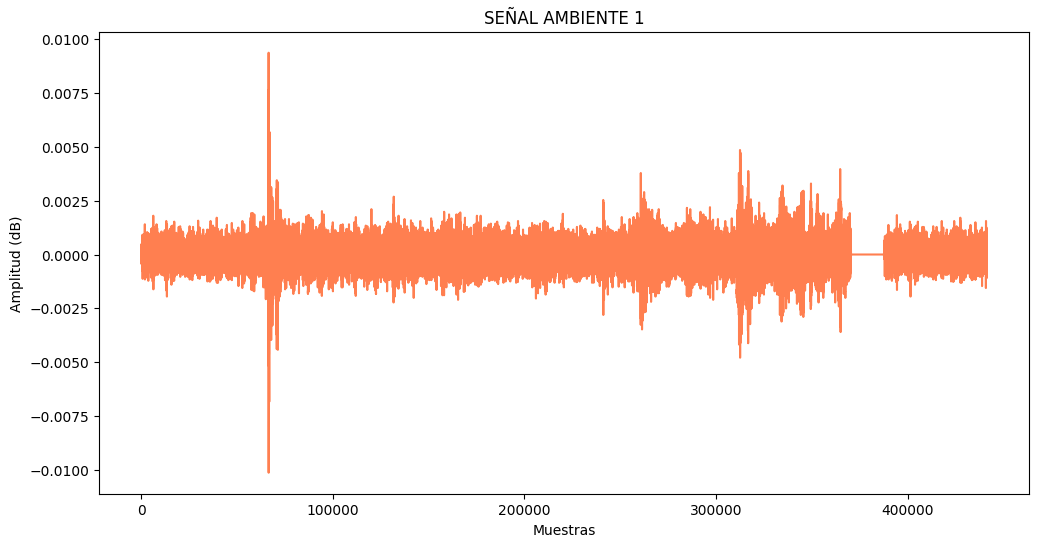

In [ ]:
# Visualiza las se√±al Ambiente uno Fuente 1

plt.figure(figsize=(12, 6))
plt.title('SE√ëAL AMBIENTE 1')
plt.plot(amb1, color='coral')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()


**Figura #05 "Visualizaci√≥n de la Se√±al de Ambiente Obtenida con la Fuente #01 ". Elaboraci√≥n Propia**

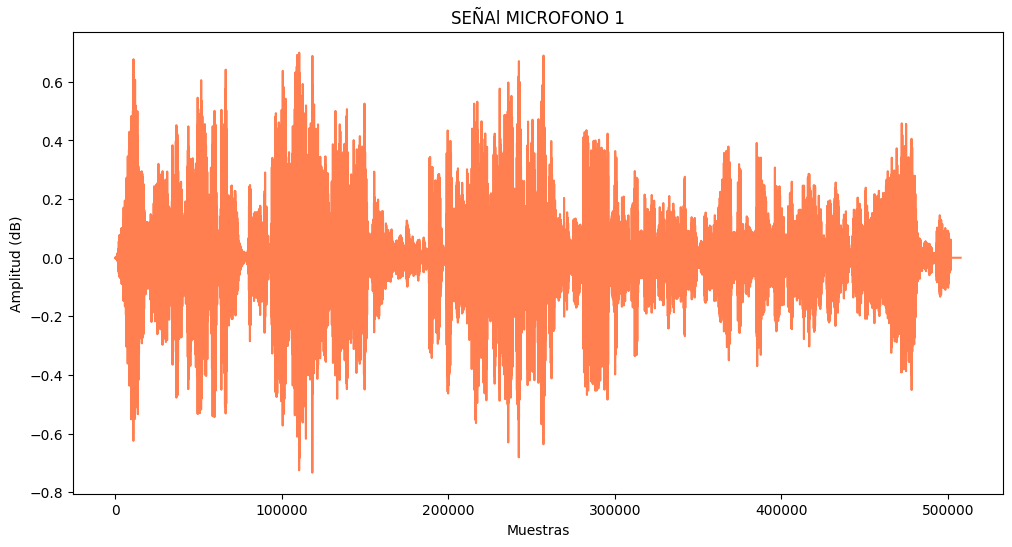

In [ ]:
# Visualiza las se√±al Microfono con Fuente 1
plt.figure(figsize=(12, 6))
plt.title('SE√ëAl MICROFONO 1')
plt.plot(voces1, color='coral')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #06 "Visualizaci√≥n de la Se√±al del Microfono Obtenida con la Fuente #01 ". Elaboraci√≥n Propia**

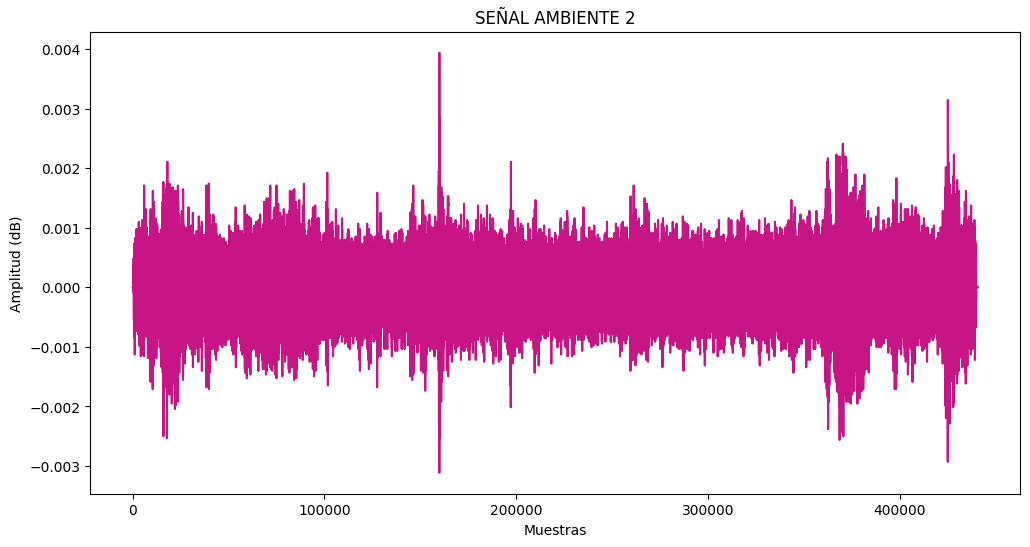

In [ ]:
# Visualiza las se√±al Ambiente con Fuente 2
plt.figure(figsize=(12, 6))
plt.title('SE√ëAL AMBIENTE 2')
plt.plot(amb2, color='mediumVioletRed')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #07 "Visualizaci√≥n de la Se√±al de Ambiente Obtenida con la Fuente #02 ". Elaboraci√≥n Propia**

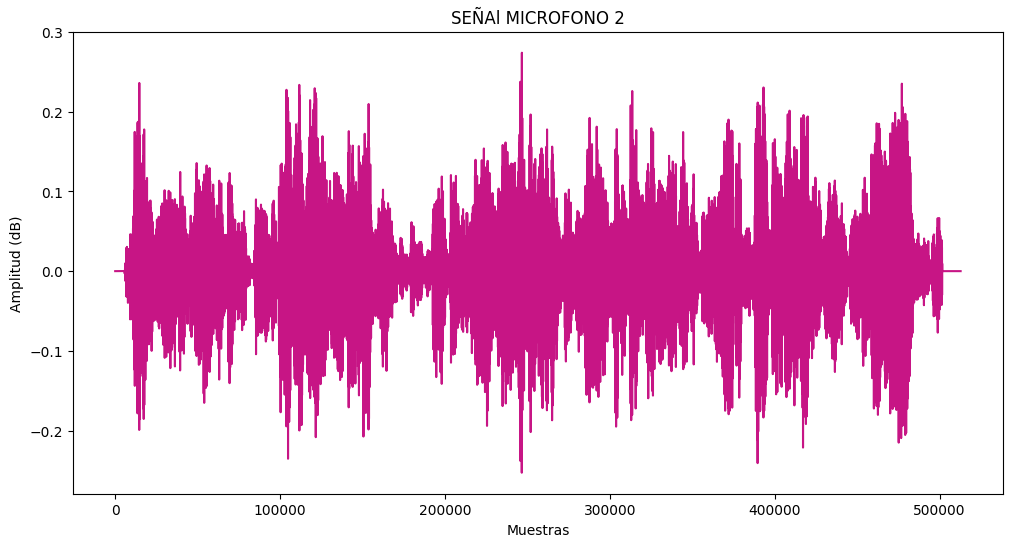

In [ ]:
# Visualiza las se√±al Microfono con Fuente 2
plt.figure(figsize=(12, 6))
plt.title('SE√ëAl MICROFONO 2')
plt.plot(voces2, color='mediumVioletRed')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #08 "Visualizaci√≥n de la Se√±al del Microfono Obtenida con la Fuente #02 ". Elaboraci√≥n Propia**

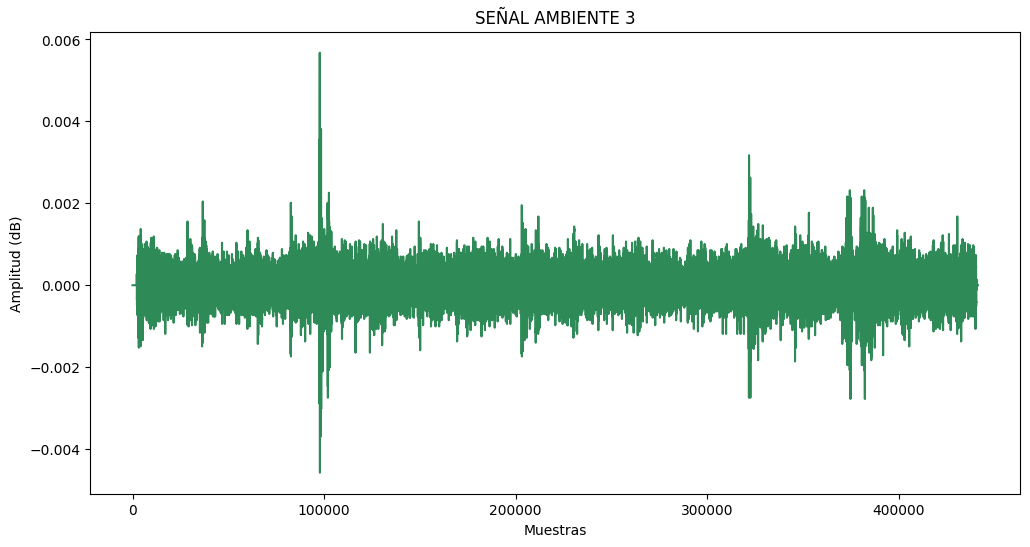

In [ ]:
# Visualiza las se√±al Ambiente con Fuente 3
plt.figure(figsize=(12, 6))
plt.title('SE√ëAL AMBIENTE 3')
plt.plot(amb3, color='SeaGreen')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #09 "Visualizaci√≥n de la Se√±al de Ambiente Obtenida con la Fuente #03 ". Elaboraci√≥n Propia**

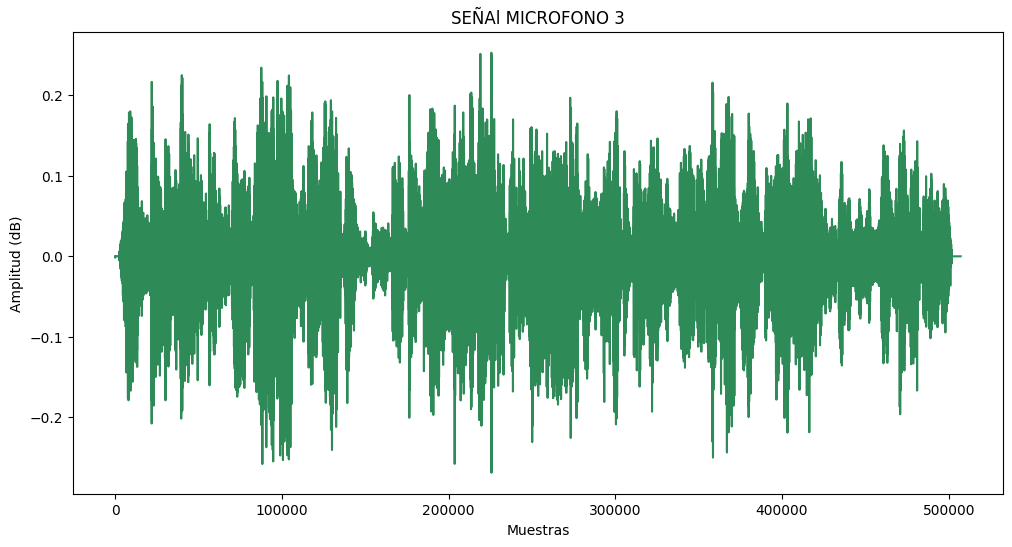

In [ ]:
# Visualiza las se√±al Microfono con Fuente 3
plt.figure(figsize=(12, 6))
plt.title('SE√ëAl MICROFONO 3')
plt.plot(voces3, color='SeaGreen')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #10 "Visualizaci√≥n de la Se√±al del Microfono Obtenida con la Fuente #03 ". Elaboraci√≥n Propia**

**3.3.3 Aplicaci√≥n de la Transformada R√°pida de Fourier**

La Transformada R√°pida de Fourier (FFT) es una herramienta esencial en el procesamiento de se√±ales de audio, permitiendo descomponer una se√±al en el dominio del tiempo en sus componentes de frecuencia. Esta transformaci√≥n es crucial para analizar y manipular el contenido espectral del audio, lo que resulta fundamental en aplicaciones como la separaci√≥n de fuentes que es el objetivo principal.

**¬øPero como Funciona la Transformada R√°pida de Fourier en el Audio?**

La FFT toma una se√±al de audio en el dominio del tiempo, que representa la amplitud de la onda sonora en funci√≥n del tiempo, y la convierte en una representaci√≥n en el dominio de la frecuencia. Esta representaci√≥n muestra la intensidad de cada componente de frecuencia presente en la se√±al original. En otras palabras, la FFT revela qu√© frecuencias est√°n presentes en el audio y con qu√© fuerza.

Para el caso de nuestro laboratorio, donde se hacen uso de tres fuentes con distintos timbres de voz (una voz aguda, una grave y una normal), la FFT permitir√≠a identificar los rangos de frecuencias correspondientes a cada voz:

* La voz aguda ocupar√≠a un rango de frecuencias m√°s alto.
* La voz grave estar√≠a en las frecuencias bajas.
* La voz normal podr√≠a estar en un rango medio.

Una vez identificados estos rangos, se puede aplicar un filtrado para separar las se√±ales de audio de cada persona.

A continuaci√≥n,  se muestra el c√≥digo con el el que se calcula la transformada para cada una de las fuentes, lo que permitira conocer la densidad espectral de potencia (PSD) para cada se√±al.


En este apartado, se logra entender que el comando **np.fft.fft(voces)** permite calcular la se√±al de audio almacenada en la voces en una matriz. El resultado,representa los componentes de frecuencia de la se√±al original.Permitiendo ver qu√© frecuencias son dominantes en cada se√±al de audio. Esta informaci√≥n permite distinguir entre diferentes fuentes en funci√≥n de sus caracter√≠sticas espectrales √∫nicas.


In [ ]:
# Realizar FFT en cada se√±al
fft_voces1 = np.fft.fft(voces1)
fft_voces2 = np.fft.fft(voces2)
fft_voces3 = np.fft.fft(voces3)

Con lo anterior,la **densidad espectral de potencia (PSD)** es una herramienta fundamental para separar fuentes del audio mezclada inicialmente.

La PSD describe c√≥mo se distribuye la potencia de una se√±al en funci√≥n de la frecuencia. En el caso de las se√±ales de audio capturadas por los micr√≥fonos, la PSD nos mostrar√° qu√© frecuencias contienen m√°s energ√≠a, lo cual puede ser √∫til para identificar las caracter√≠sticas espectrales de cada fuente y asi poder facilitar su separaci√≥n.

La PSD se calcula sustancialmente utilizando la Transformada de Fourier, Como ya se utilizo el comando anteriormente se toma la Transformada de Fourier de la se√±al, se calcula su magnitud al cuadrado, y luego se promedia sobre m√∫ltiples segmentos de la se√±al para obtener una estimaci√≥n m√°s suave y precisa de la PSD.

In [ ]:
# Calcular la densidad espectral de potencia (PSD) para cada se√±al
psd_voces1 = np.abs(fft_voces1) ** 2
psd_voces2 = np.abs(fft_voces2) ** 2
psd_voces3 = np.abs(fft_voces3) ** 2


Ya sustentado lo anterior, se muestran a continuaci√≥n las gr√°ficas obtenidas.

* **Gr√°fica PSD para Voces 1**

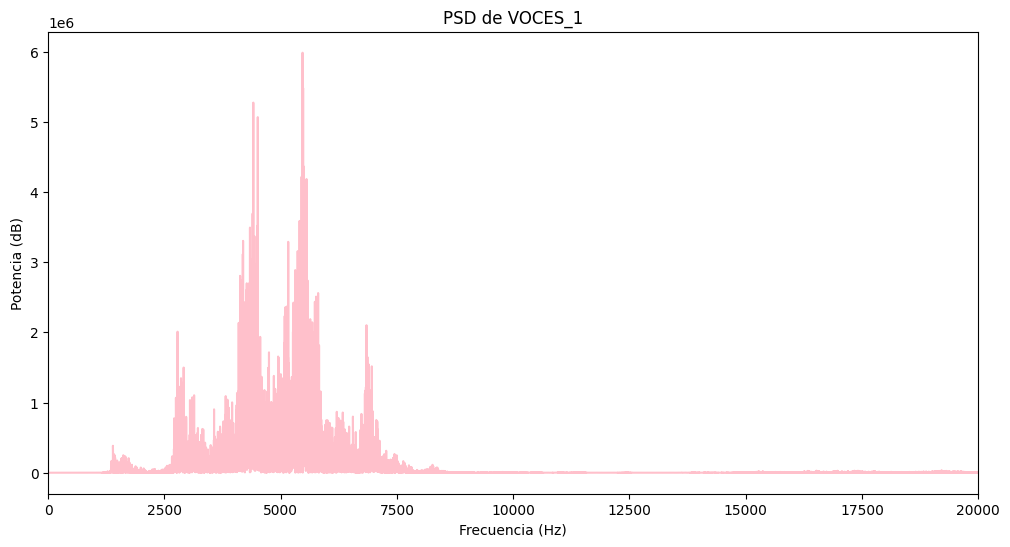

In [ ]:
# Graficar la PSD para voces 1
plt.figure(figsize=(12, 6))
plt.title('PSD de VOCES_1')
plt.plot(psd_voces1, color='pink')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.xlim(0, 20000)
plt.show()

**Figura #11. "An√°lisis de la Densidad Espectral de Potencia de la Se√±al voces 1". Elaboraci√≥n Propia**

* **Gr√°fica PSD para Voces 2**

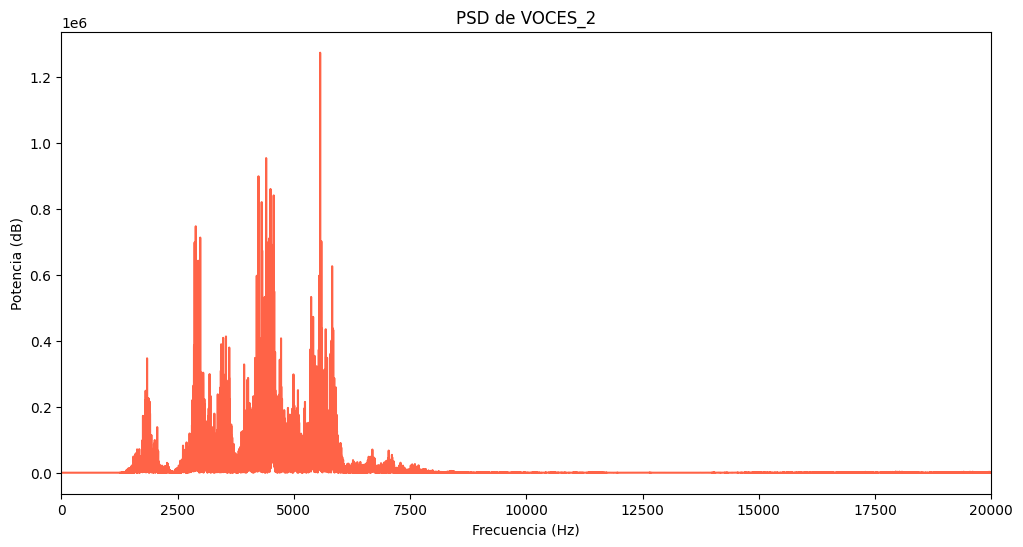

In [ ]:
# Graficar la PSD para voces 2
plt.figure(figsize=(12, 6))
plt.title('PSD de VOCES_2')
plt.plot(psd_voces2, color='tomato')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.xlim(0, 20000)
plt.show ()

**Figura #12. "An√°lisis de la Densidad Espectral de Potencia de la Se√±al voces 2". Elaboraci√≥n Propia**

* **Gr√°fica PSD para Voces 3**

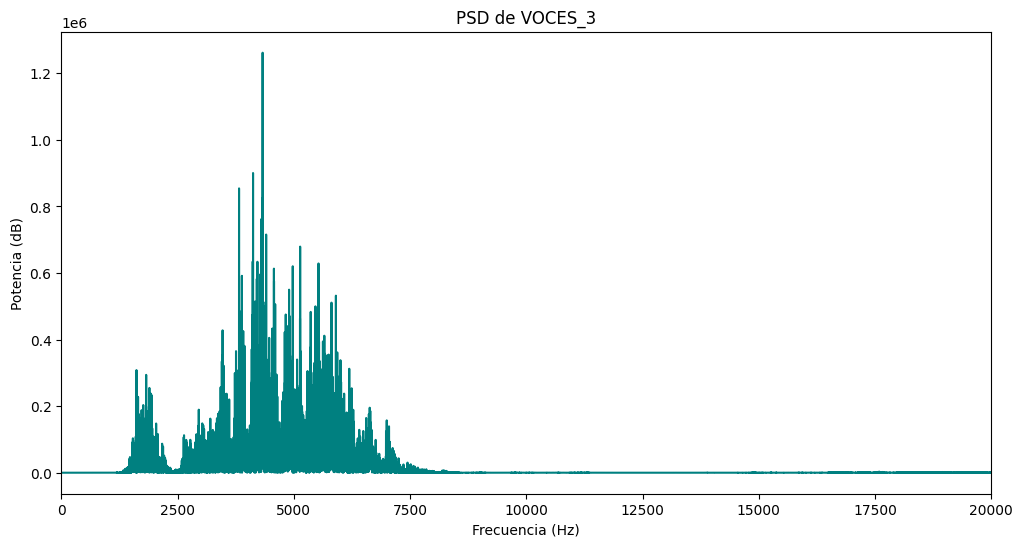

In [ ]:
# Graficar la PSD para voces 3
plt.figure(figsize=(12, 6))
plt.title('PSD de VOCES_3')
plt.plot(psd_voces3, color ='teal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.xlim(0, 20000)
plt.show()

**Figura #13 "An√°lisis de la Densidad Espectral de Potencia de la Se√±al voces 3".Elaboraci√≥n Propia**

Para antes de la aplicaci√≥n del m√©todo, se tuvo en cuenta  un paso a paso para entender los siguientes factores:

* **Igualaci√≥n de longitudes:** Aseguramos que todas las se√±ales tengan la misma duraci√≥n utilizando np.padpara rellenar con ceros las se√±ales m√°s cortas. Esto es crucial para alinear correctamente las se√±ales en el tiempo.

* **Creaci√≥n de la mezcla:** Combinamos las se√±ales en una matriz audio_mix donde cada columna representa un instante de tiempo y cada fila corresponde a un micr√≥fono.

* **Guardado y carga de la mezcla:** Guardamos la mezcla como un archivo WAV y luego la cargamos utilizando librosa para facilitar su procesamiento posterior.

* **Definici√≥n de retrasos:** Especificamos los retrasos (en muestras) asociados a cada micr√≥fono en la lista retraso. Es fundamental reemplazar los valores de ejemplo con los retrasos reales que corresponden a la configuraci√≥n de grabaci√≥n.

In [ ]:
longitud_max = max(len(voces1), len(voces2), len(voces3))

voces1 = np.pad(voces1, (0, longitud_max - len(voces1)))
voces2 = np.pad(voces2, (0, longitud_max - len(voces2)))
voces3 = np.pad(voces3, (0, longitud_max - len(voces3)))
audio_mix = np.vstack((voces1, voces2, voces3)).T

# Calcular el retraso en funci√≥n de la distancia entre micr√≥fonos
def calculate_delay(distansias, velocidas, sr):
    return tuple(int(d / velocidas * sr) for d in distansias)

distansias = [0, 0.8, 1.6]
velocidas = 343
delay = calculate_delay(distansias, velocidas, voces1_sr)

**3.3.4 M√©todo de Separaci√≥n "Beamforming"**
El Beamforming, es una t√©cnica de procesamiento de se√±ales que permite enfocar la recepci√≥n o transmisi√≥n de energ√≠a en una direcci√≥n espec√≠fica, mientras se aten√∫a el ruido y las interferencias provenientes de otras direcciones. En el contexto de la separaci√≥n de fuentes de audio, el beamforming se utiliza para "dirigir" un arreglo de micr√≥fonos hacia una fuente sonora de inter√©s, mejorando la relaci√≥n se√±al-ruido (SNR) y facilitando la extracci√≥n de la se√±al deseada de una mezcla.

El principio basico del beamforming se basa en la combinaci√≥n de las se√±ales sonoras capturadas por m√∫ltiples micr√≥fonos en nuestro caso los 3 actuadores, aplicando retardos y ponderaciones espec√≠ficas a cada se√±al antes de se sumarlas. Estos retardos y ponderaciones se calculan de manera que las se√±ales provenientes de la direcci√≥n deseada se refuercen constructivamente, mientras que las se√±ales provenientes de otras direcciones se cancelan o aten√∫an.

**Ventajas de BeamForming para el Laboratorio:**

* En el entorno planteado del c√≥ctel, el Beamforming permite enfocar la captura de audio hacia una fuente de sonido espec√≠fica, como un hablante en particular.

* Al reducir la captaci√≥n de sonidos no deseados, el Beamforming mejora la relaci√≥n se√±al-ruido (SNR) de la se√±al de voz capturada.Esto sirve para visibilizar m√°s las caracter√≠sticas espectrales de la voz, como formantes, arm√≥nicos y variaciones tonales.

A continuaci√≥n, se muestra el desarrollo del m√©todo:

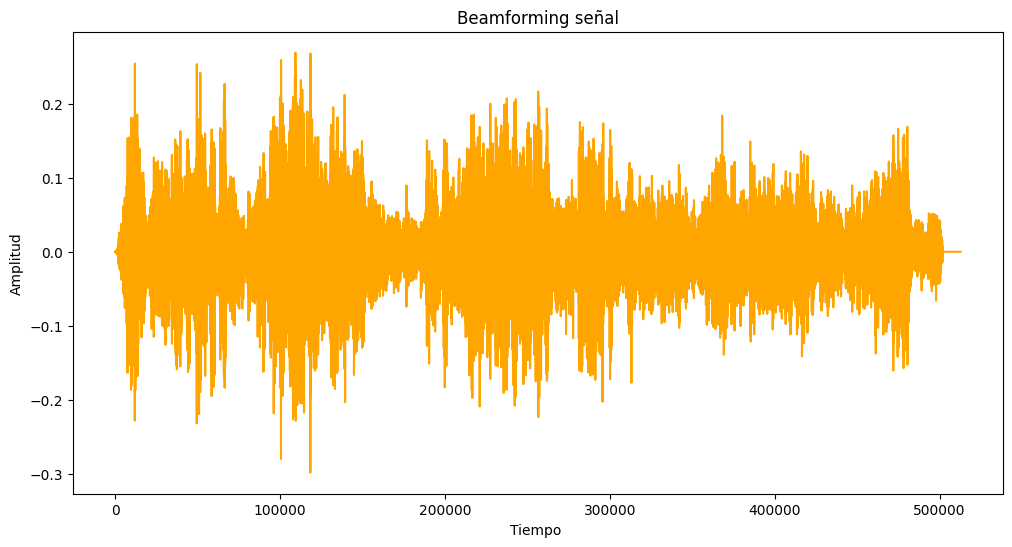

SNR FINAL: 34.95931850246362 dB


In [ ]:
def beamforming(signals, delay):
    num_mics = signals.shape[1]
    beamformed_signal = np.zeros(len(signals))

    for i, delay_i in enumerate(delay):
        beamformed_signal += np.roll(signals[:, i], delay_i)

    return beamformed_signal / num_mics

beamformed_signal = beamforming(audio_mix, delay)

# Escribe la se√±al formada por haz en un archivo
sf.write('sinal_bonita.wav', beamformed_signal, voces1_sr)

beamformed_signal, voces1_sr = sf.read ('sinal_bonita.wav')

# Graficar la se√±al en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(beamformed_signal, color='orange')
plt.xlabel('Tiempo ')
plt.ylabel('Amplitud')
plt.title('Beamforming se√±al')
plt.show()


longitud_max = max(len(amb1), len(amb2), len(amb3))
amb1 = np.pad(amb1, (0, longitud_max - len(amb1)))
amb2 = np.pad(amb2, (0, longitud_max - len(amb2)))
amb3 = np.pad(amb3, (0, longitud_max - len(amb3)))

# Calcular la suma de las tres se√±ales de los micr√≥fonos
se√±al_suma = amb1 + amb2 + amb3

# Calcular el SNR de la se√±al beamformed en contra de la suma
SNR_FINAL= snrcalculo(beamformed_signal, se√±al_suma)
print(Fore.BLUE+ "SNR FINAL:", SNR_FINAL, "dB")

**Figura #14 "Se√±al Separada con el M√©todo de Separaci√≥n Beamforming  ".Elaboraci√≥n Propia**

El valor de **SNR de 34,9593 dB** indica una relaci√≥n se√±al/ruido bastante buena. En general, es deseable contar con valores de SNR m√°s altos, ya que significan que la se√±al deseada es significativamente m√°s fuerte que el ruido de fondo. En el contexto de las se√±ales de audio, una SNR m√°s alta generalmente se traduce en un sonido m√°s limpio y m√°s inteligible.

**4. An√°lisis de Datos:**

En este laboratorio, se llev√≥ a cabo un experimento utilizando tres micr√≥fonos ubicados de manera aleatoria en una habitaci√≥n, donde tres personas hablaban simult√°neamente. Esto permiti√≥ capturar tres fuentes de audio distintas, cada una con una mezcla de las voces y el ruido ambiental presente en la habitaci√≥n. Posteriormente, el objetivo fue procesar estas se√±ales para analizar las caracter√≠sticas de las voces, calcular las relaciones se√±al-ruido (SNR) y aplicar t√©cnicas de beamforming para separar una de las voces, mejorando su claridad en relaci√≥n con el ruido y las dem√°s voces. El primer paso consisti√≥ en calcular el SNR de cada se√±al captada por los micr√≥fonos. Para ello, se compar√≥ la potencia de las se√±ales de las voces con el ruido de referencia presente en la habitaci√≥n. Los resultados mostraron que el SNR de cada una de las se√±ales fue positivo siendo valores de 46.2 ,41.5 , y 42.6 , lo que indica que las voces se registraron con suficiente claridad en relaci√≥n con el ruido ambiente. Este resultado inicial fue clave, ya que un SNR positivo garantiza que las se√±ales de las voces son m√°s potentes que el ruido de fondo, lo que facilita su posterior procesamiento cabe resaltar que la frecuencia de muestreo fue 44.1 Khz. A continuaci√≥n, se realiz√≥ un an√°lisis en el dominio de la frecuencia mediante la aplicaci√≥n de la Transformada R√°pida de Fourier (FFT) a cada una de las se√±ales capturadas por los micr√≥fonos. Este paso permiti√≥ descomponer las se√±ales en sus componentes de frecuencia, lo que facilita la identificaci√≥n de las caracter√≠sticas espectrales de las voces. Despu√©s de la FFT, se calcul√≥ la densidad espectral de potencia (PSD), que mide la distribuci√≥n de la potencia de la se√±al en funci√≥n de la frecuencia en este caso para las 3 se observa que las frecuencias llegan a un aproximado de 8000 Hz esto significa que en ese rango se encuentra los sonidos que evidenciaron los micr√≥fonos y totalmente de acuerdo a la voz humana. Esta informaci√≥n es √∫til para visualizar c√≥mo se distribuye la energ√≠a de las voces en diferentes rangos de frecuencias y para diferenciar entre las voces capturadas. Tras obtener la FFT y el PSD, se combin√≥ la informaci√≥n de los tres micr√≥fonos en una se√±al conjunta que conten√≠a las tres voces superpuestas junto con el ruido ambiental. Esta se√±al representaba la mezcla de todas las fuentes de sonido presentes en la sala y serv√≠a como entrada para el siguiente paso, donde se aplicar√≠a la t√©cnica de beamforming. El beamforming es una t√©cnica utilizada para mejorar la claridad de una fuente sonora en particular mediante la alineaci√≥n de las se√±ales provenientes de varios micr√≥fonos. En este caso, se aplic√≥ beamforming para enfocar y separar una de las voces, aisl√°ndola del resto de las se√±ales. Esto se logr√≥ ajustando los tiempos de llegada de las se√±ales a los micr√≥fonos, lo que permite reforzar la voz que se desea extraer mientras se aten√∫an las dem√°s voces y el ruido ambiental. Una vez obtenida la se√±al mejorada mediante beamforming, se procedi√≥ a calcular nuevamente el SNR, pero esta vez comparando la se√±al mejorada con las se√±ales originales de los tres micr√≥fonos. Al igual que en los c√°lculos iniciales, el SNR result√≥ ser positivo, lo que indica que el proceso de beamforming fue exitoso en la tarea de separar y mejorar la claridad de la voz seleccionada en comparaci√≥n con la mezcla inicial de ruido.

**1.¬øC√≥mo afecta la posici√≥n relativa de los micr√≥fonos y las fuentes sonoras en la efectividad de la separaci√≥n de se√±ales?**

La posici√≥n de los micr√≥fonos y las fuentes sonoras es muy importante para separar se√±ales de audio. Cu√°nto m√°s separados est√©n los micr√≥fonos y las fuentes, m√°s f√°cil ser√° distinguir entre diferentes sonidos porque habr√° una mayor diferencia en el tiempo que tarda el sonido en llegar a cada micr√≥fono. Adem√°s, los micr√≥fonos tienen patrones de captaci√≥n que les hacen m√°s sensibles a ciertos sonidos dependiendo de la direcci√≥n de donde vienen. Si colocamos los micr√≥fonos de manera estrat√©gica, podemos mejorar la capacidad para captar los sonidos deseados y reducir los no deseados. Elegir bien la ubicaci√≥n de los micr√≥fonos ayuda a obtener mejor informaci√≥n para separar las fuentes de sonido, como se explica en el libro de Van Trees, Optimum Array Processing (2002).

**2.¬øQu√© mejoras implementar√≠a en la metodolog√≠a para obtener mejores resultados?**

Se disponga de instrumentos de mayor precisi√≥n para la recolecci√≥n de las se√±ales sonoras, asegur√°ndose de que las voces sean captadas con la claridad y nitidez debidas. Asimismo, se aconseja la implementaci√≥n de t√©cnicas avanzadas de separaci√≥n de fuentes, tales como la divisi√≥n en valores singulares o m√©todos como ICA, que permitan discernir las se√±ales mezcladas con m√°s exactitud. Adem√°s, ser√≠a prudente realizar m√∫ltiples ensayos en diversas condiciones ac√∫sticas, para as√≠ obtener un amplio espectro de datos que permita realizar un an√°lisis exhaustivo en frecuencia.

**5. Conclusiones:**


* El m√©todo de beamforming demostr√≥ ser una t√©cnica valiosa para la separaci√≥n de se√±ales de voz en un entorno de mezcla. Al dirigir la atenci√≥n del sistema hacia una direcci√≥n espec√≠fica, se logr√≥ mejorar la relaci√≥n se√±al-ruido (SNR) y aislar la se√±al de inter√©s, incluso en presencia de otras fuentes de sonido.

*  La relaci√≥n se√±al-ruido (SNR) final se revela como un indicador clave de la calidad de la se√±al separada. Una SNR alta, como la obtenida en este laboratorio, indica una se√±al limpia y clara, lo que facilita su posterior procesamiento y an√°lisis. Es fundamental comprender c√≥mo diferentes tipos de ruido afectan la SNR para desarrollar estrategias efectivas de mitigaci√≥n y mejora de la calidad de la se√±al.

* El an√°lisis en frecuencia de las se√±ales de voz permiti√≥ visualizar y comprender la distribuci√≥n de la energ√≠a en diferentes bandas de frecuencia, lo cual es esencial para la identificaci√≥n y separaci√≥n de fuentes sonoras. La capacidad de analizar el espectro de frecuencias, tanto de la se√±al original como de la se√±al procesada, proporciona informaci√≥n valiosa sobre la efectividad de las t√©cnicas de separaci√≥n y permite identificar √°reas de mejora.

**6. Recomendaciones:**
1. Primero, para ser compilado aseg√∫rese de que todos los paquetes necesarios est√©n instalados.Si no en la primera parte del codigo pueden encontrar las librerias necesarias a lo largo del codigo.

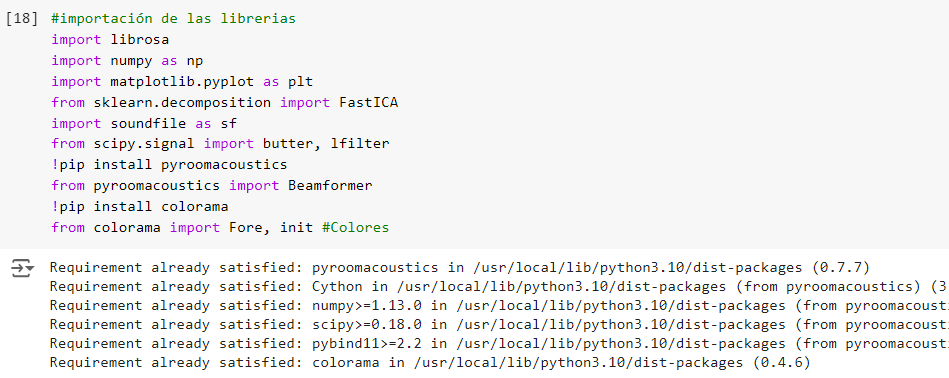

2. Verifique que los Archivos WAV est√©n en el directorio de trabajo actual o especifica de la ruta completa al archivo.

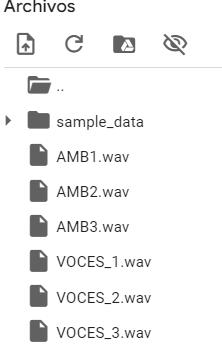

**si usted no cumple con estos  pasos es posible que el codigo no corra por las configuraciones del compilador collab**



**7. Bibliograf√≠a:**

[1].Rosal, M. (2021). Sonido digital I.

[2].Proakis, J. G., & Manolakis, D. G. (2007). Digital Signal Processing: Principles, Algorithms, and Applications (4th ed.).

[3].Oppenheim, A. V., Schafer, R. W., & Buck, J. R. (2011). Tratamiento de se√±ales en tiempo discreto.

[4].Cord√≥n Urbiola, D. (2012). Separaci√≥n de fuentes sonoras arm√≥nicas: estudio comparativo.

[5].Di Persia, LE (2017). Separaci√≥n ciega de fuentes sonoras: revisi√≥n hist√≥rica y desarrollos recientes.

[6].Heras Rodr√≠guez, MDL (2024). La transformada r√°pida de Fourier: fundamentos y aplicaciones (Tesis de licenciatura).

[7].Gonz√°lez, J., Forero, E., Jim√©nez, F. y Mari√±o, I. (2013). Atenuaci√≥n de rizado en la densidad espectral de potencia calculada en una se√±al de ritmo card√≠aco. Matem√°tica , 11 (2), 22-26.
